In [6]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 2. Load Dataset
df = pd.read_csv('/content/netflix_titles.csv')


In [7]:
# 3. Feature Engineering
netflix = df.copy()

# Ubah date_added ke datetime
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

# Ekstrak angka dari kolom duration
netflix['duration_int'] = netflix['duration'].str.extract('(\d+)').astype(float)
netflix['duration_type'] = netflix['duration'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

# Imputasi nilai kosong dengan 'Unknown'
fill_cols = ['director', 'cast', 'country', 'rating', 'duration']
for col in fill_cols:
    netflix[col].fillna('Unknown', inplace=True)

# Tambahkan fitur tahun ditambahkan ke Netflix
netflix['year_added'] = netflix['date_added'].dt.year

<ipython-input-7-7a70c03589ce>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix[col].fillna('Unknown', inplace=True)


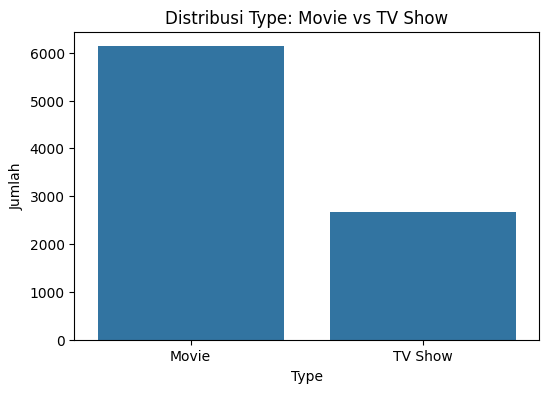

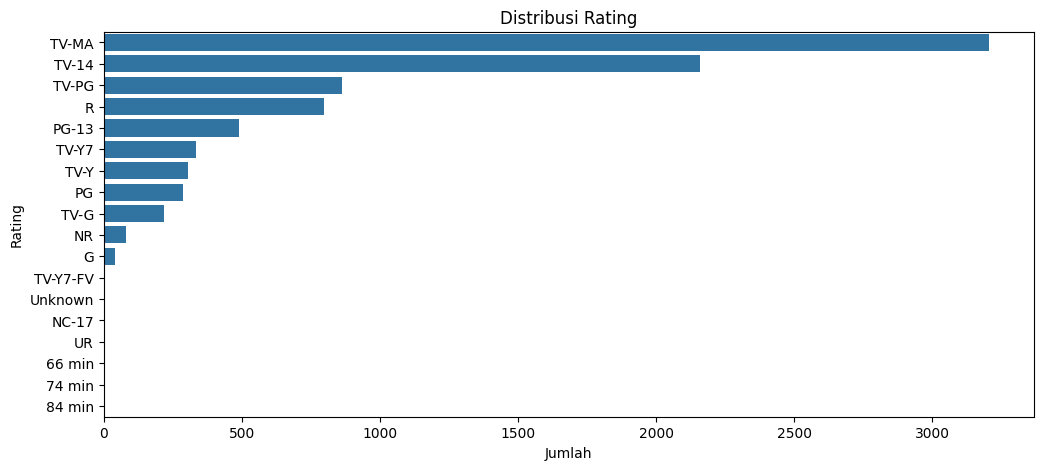

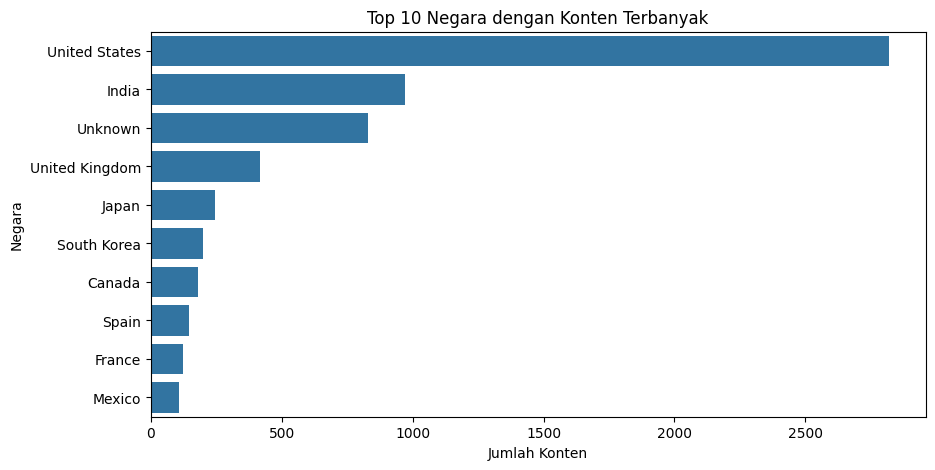

In [8]:
# 4. EDA & Visualisasi

# Visualisasi 1: Type (Movie vs TV Show)
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=netflix)
plt.title('Distribusi Type: Movie vs TV Show')
plt.xlabel('Type')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi 2: Rating
plt.figure(figsize=(12,5))
sns.countplot(y='rating', data=netflix, order=netflix['rating'].value_counts().index)
plt.title('Distribusi Rating')
plt.xlabel('Jumlah')
plt.ylabel('Rating')
plt.show()

# Visualisasi 3: Negara terbanyak
top_countries = netflix['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Negara dengan Konten Terbanyak')
plt.xlabel('Jumlah Konten')
plt.ylabel('Negara')
plt.show()

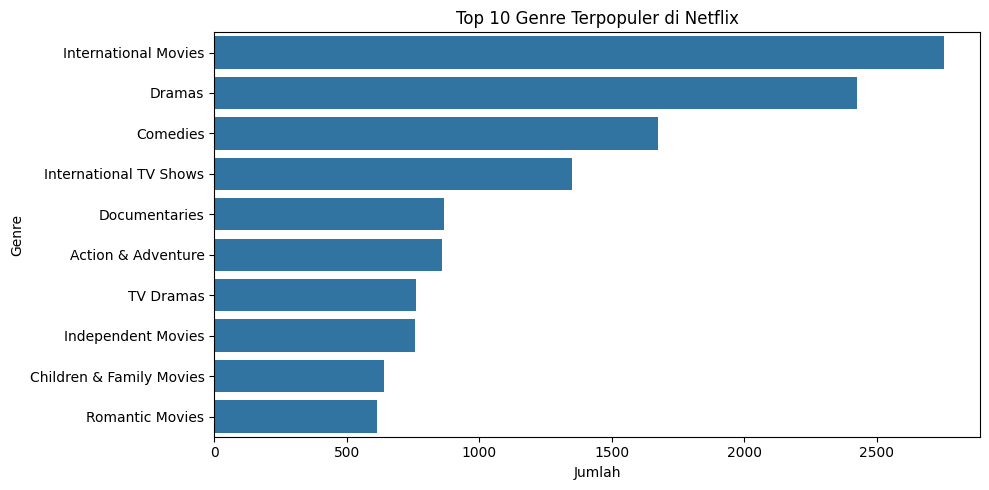

In [9]:
# Plot genre
genres, counts = zip(*top_genres)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres))
plt.title('Top 10 Genre Terpopuler di Netflix')
plt.xlabel('Jumlah')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [10]:
# 5. Penjelasan Statistik (Contoh perhitungan)
print("\n📌 Statistik Durasi untuk Film:")
movie_durations = netflix[netflix['type'] == 'Movie']['duration_int'].dropna()

mean = movie_durations.mean()
median = movie_durations.median()
mode = movie_durations.mode().iloc[0]

print(f"Mean (Rata-rata): {mean:.2f} menit")
print(f"Median (Tengah): {median:.0f} menit")
print(f"Mode (Modus): {mode:.0f} menit")

# Korelasi antara tahun rilis dan durasi
corr = netflix[['release_year', 'duration_int']].dropna().corr().iloc[0,1]
print(f"\n📈 Korelasi Pearson (release_year vs duration): {corr:.3f}")


📌 Statistik Durasi untuk Film:
Mean (Rata-rata): 99.58 menit
Median (Tengah): 98 menit
Mode (Modus): 90 menit

📈 Korelasi Pearson (release_year vs duration): -0.249
